In [1]:
import numpy as np
from sennet.core.mmap_arrays import read_mmap_array

# read predictions
file_path = "/opt/kaggle/sennet/data_dumps/predicted/ensembled/kidney_3_dense/chunk_00/mean_prob/"
mmap_array = read_mmap_array(file_path)
print(f"{mmap_array.shape=}")

# read labels
label_path = "/opt/kaggle/sennet/data_dumps/processed/kidney_3_dense/label"
mmap_labels = read_mmap_array(label_path)
print(f"{mmap_labels.shape=}")

mmap_array.shape=[501, 1706, 1510]
mmap_labels.shape=[501, 1706, 1510]


In [2]:
mid_slice_indx = mmap_array.shape[0] // 2
mid_slice = np.array(mmap_array.data[mid_slice_indx])

mid_slice_labels = np.array(mmap_labels.data[mid_slice_indx])

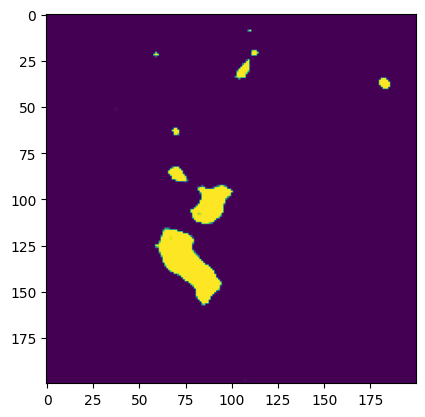

In [3]:
import matplotlib.pyplot as plt

plt.imshow(mid_slice[200:400, 600:800])

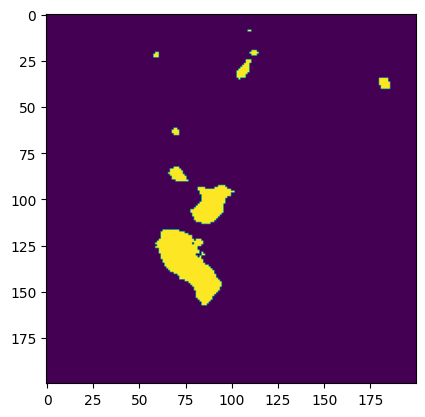

In [4]:
import matplotlib.pyplot as plt

plt.imshow(mid_slice_labels[200:400, 600:800])

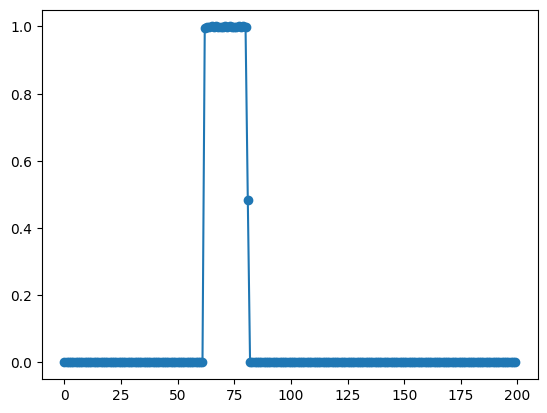

In [5]:
density_slice = mid_slice[200:400, 600:800][130, :]
plt.plot(density_slice, marker='o')

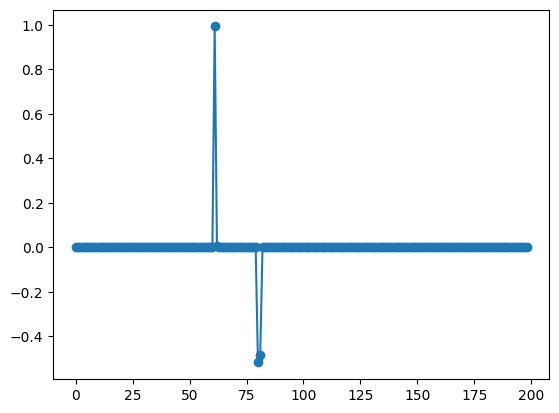

In [6]:
plt.plot(np.diff(density_slice), marker='o')

# harder example

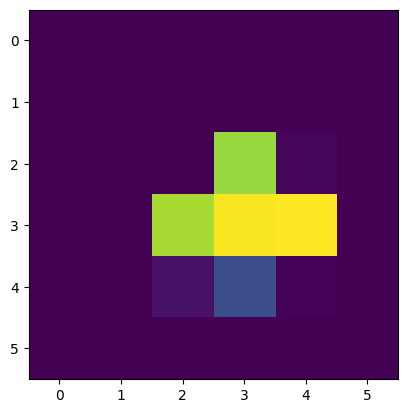

In [7]:
import matplotlib.pyplot as plt

plt.imshow(mid_slice[200:400, 600:800][15:30, 50:70][4:10, 6:12])

In [8]:
mid_slice[200:400, 600:800][15:30, 50:70][4:10, 6:12][2]

array([5.66244120e-07, 3.03983685e-06, 3.76075502e-04, 8.45458976e-01,
       1.89552305e-02, 5.60283655e-06])

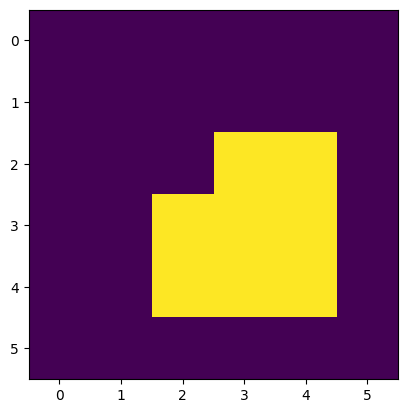

In [9]:
import matplotlib.pyplot as plt

plt.imshow(mid_slice_labels[200:400, 600:800][15:30, 50:70][4:10, 6:12])

# histogram

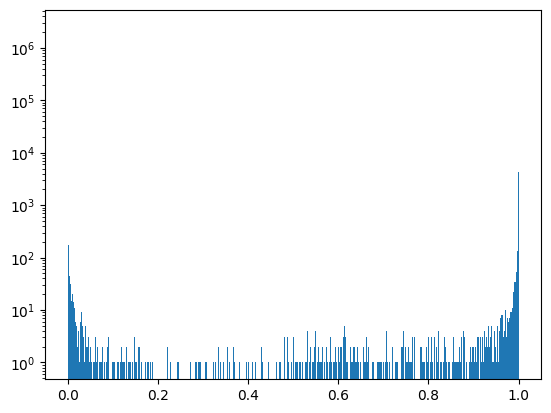

In [10]:
plt.hist(mid_slice.flatten(), bins=1000);

plt.yscale('log')

# 3D visualization

In [11]:
x = mmap_array.data
x_img = np.sum(mmap_array.data, axis=0)

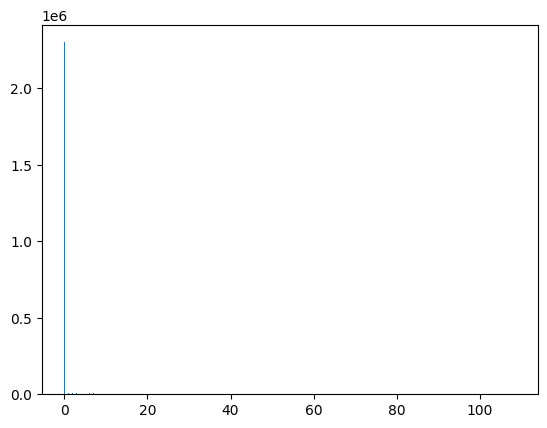

In [14]:
plt.hist(x_img.flatten(), bins=1000);

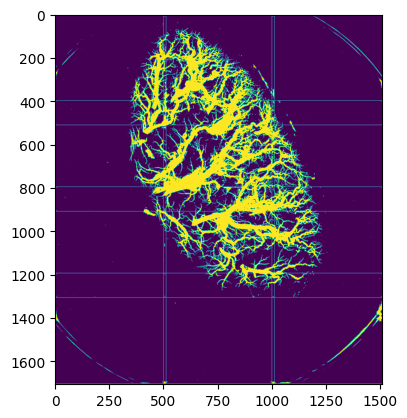

In [74]:


x_img_th = np.array(x_img > 0.002, dtype=np.uint8)
plt.imshow(x_img_th)

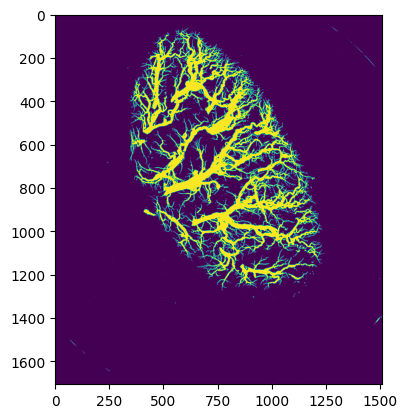

In [60]:


x_img_th = np.array(x_img > 0.02, dtype=np.uint8)
plt.imshow(x_img_th)

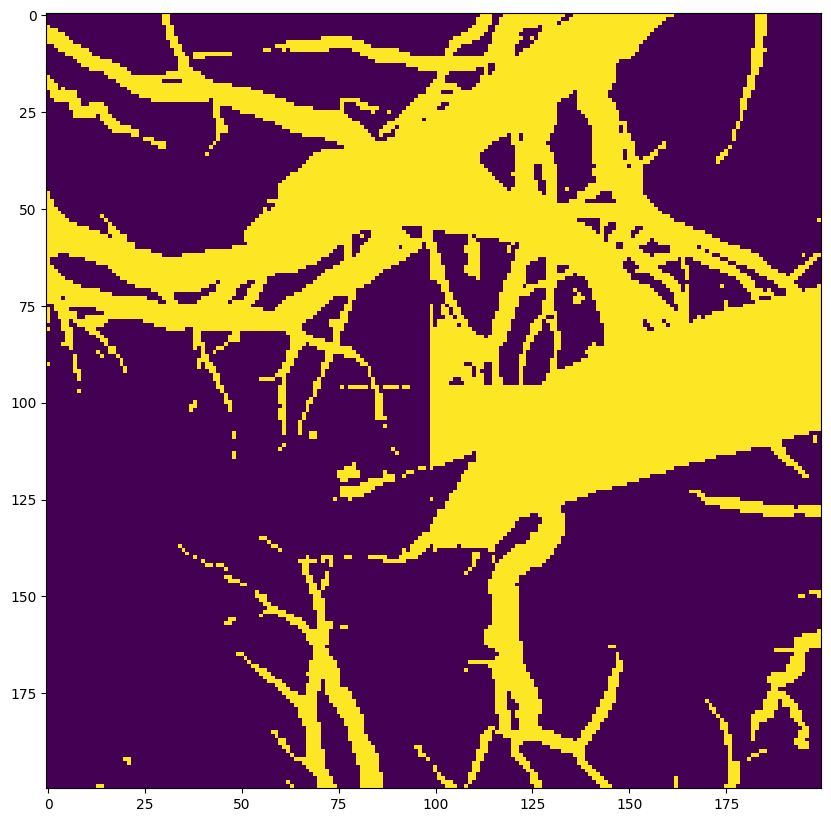

In [68]:
plt.figure(figsize=(10, 20))

plt.imshow(x_img_th[700:900, 400:600])

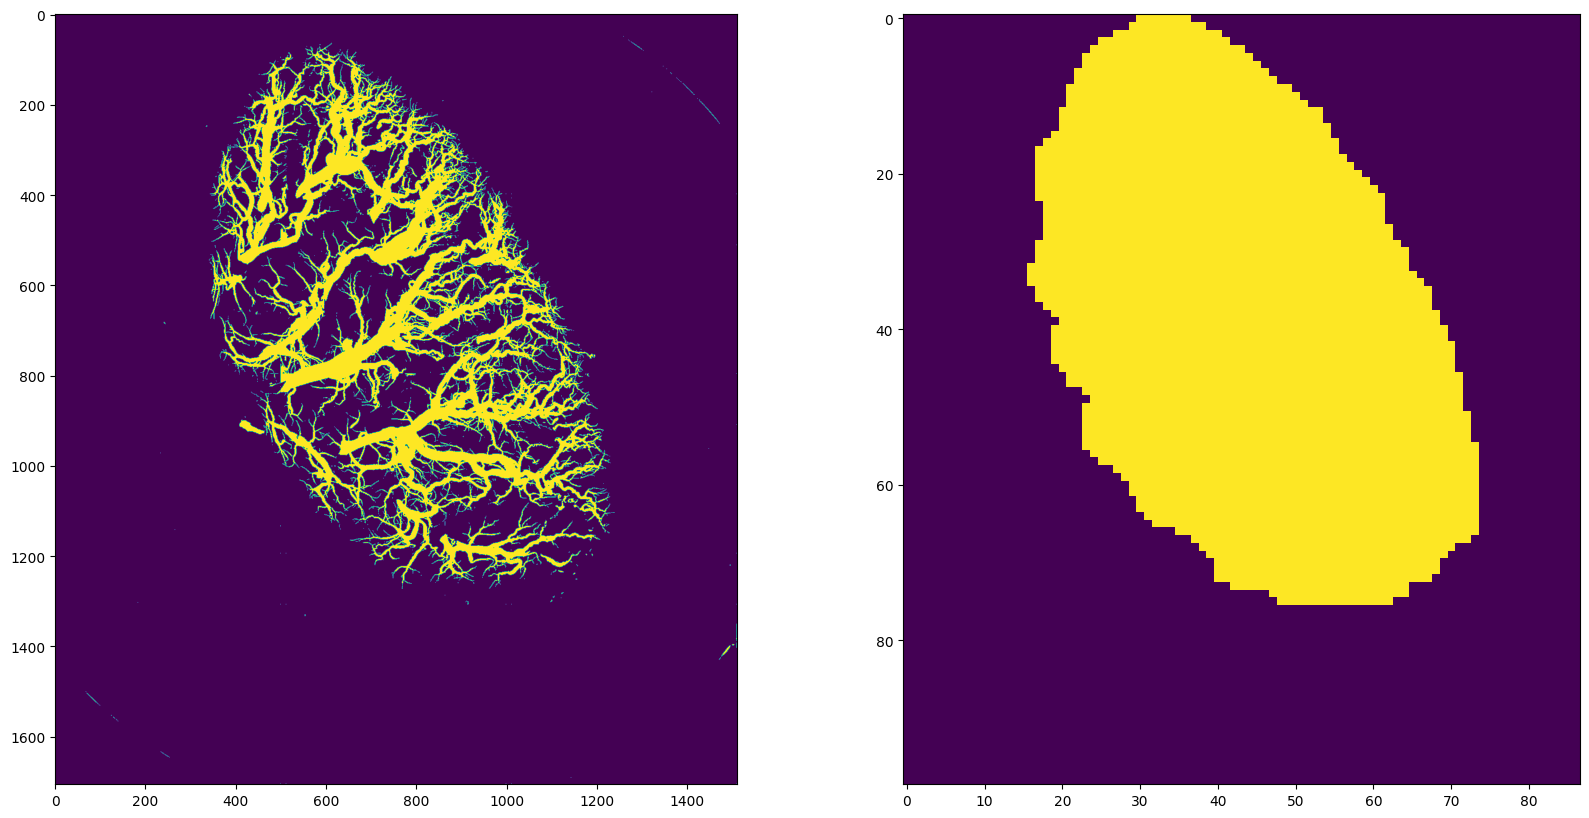

In [62]:
# apply max over 32x32 kernel, using pytorch
import torch
import torch.nn.functional as F

x_img_th_torch = torch.from_numpy(x_img_th).unsqueeze(0).unsqueeze(0).float()
# apply max over 32x32 kernel, using pytorch
x_img_th_avg = F.avg_pool2d(x_img_th_torch, kernel_size=128, stride=16)
x_img_th_avg = x_img_th_avg.squeeze().numpy() > 0.1


# two figures
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.imshow(x_img_th)

ax2.imshow(x_img_th_avg)

In [63]:
x = mmap_labels.data
x_labels = np.sum(mmap_labels.data, axis=0)

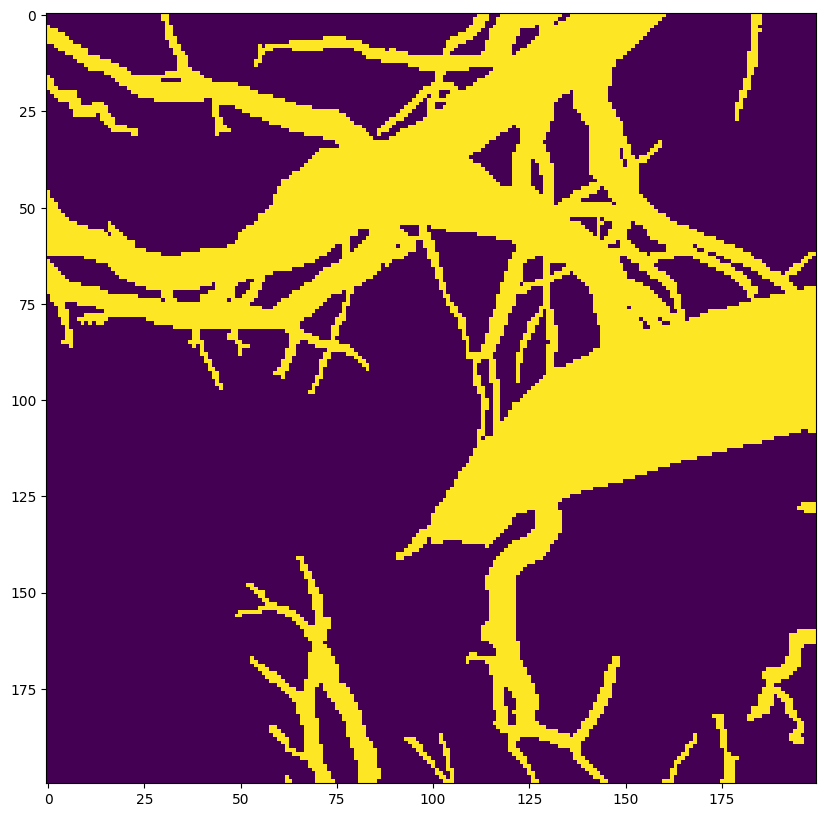

In [71]:
plt.figure(figsize=(10, 10))

plt.imshow(x_labels_th[700:900, 400:600])

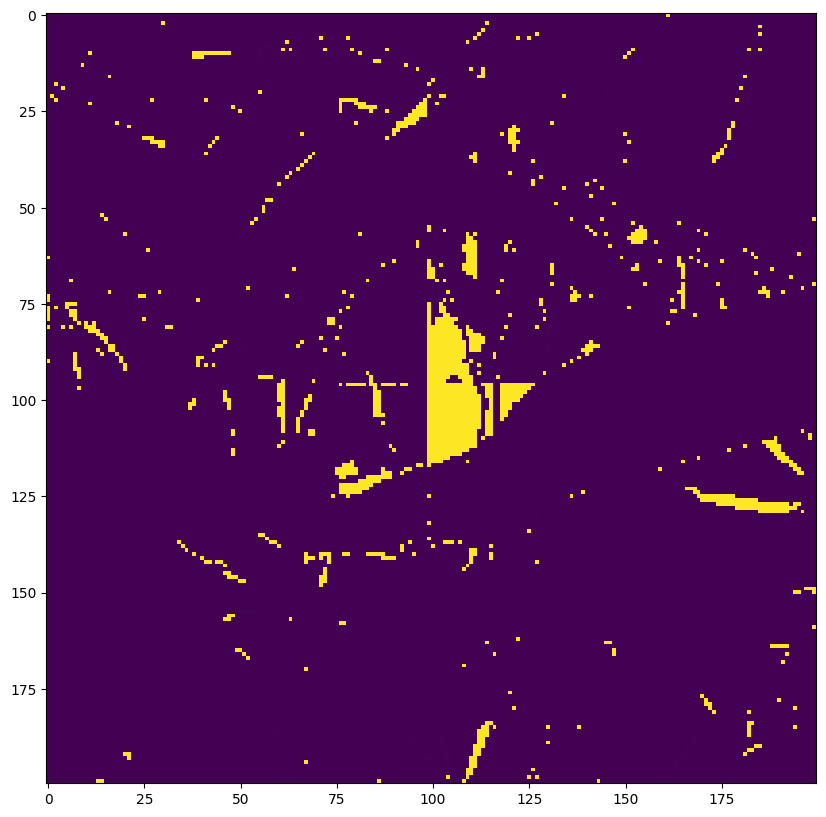

In [67]:
plt.figure(figsize=(10, 10))

x_labels_th = np.array(x_labels > 0.02, dtype=np.uint8)

diff = x_labels_th - x_img_th
plt.imshow(diff[700:900, 400:600])

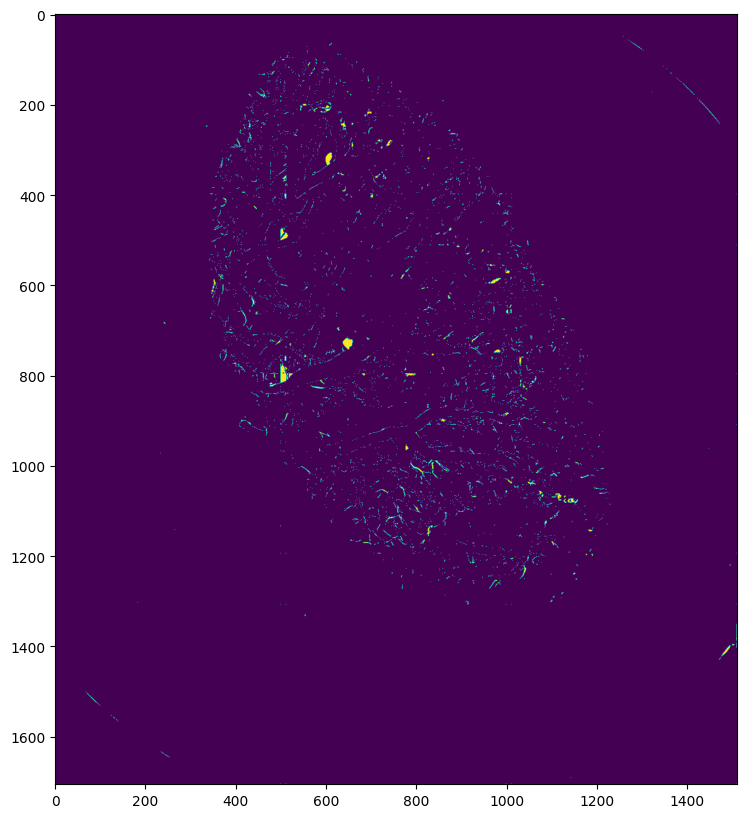

In [72]:
plt.figure(figsize=(10, 10))

plt.imshow(diff)

(B, D=depth, C=1, H, W) -> pass to the Unet to make D passes of the 2D Unet model -> ((B, D, C, H, W))
-> add couple of 3D convs to communicate across the channels -> ((B, D, C, H, W))